In [2]:
# Canny Edge Detection
# Do all the relevant imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


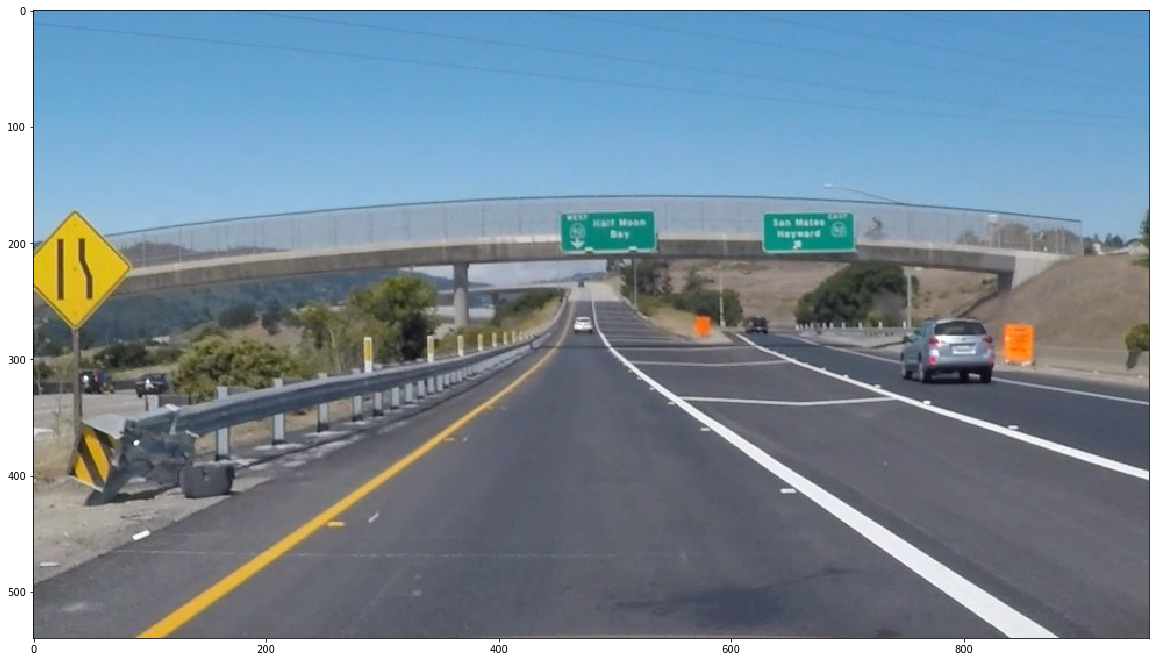

In [10]:
# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
image = mpimg.imread('exit-ramp.jpg')
plt.figure(figsize=(20,12))
plt.imshow(image)

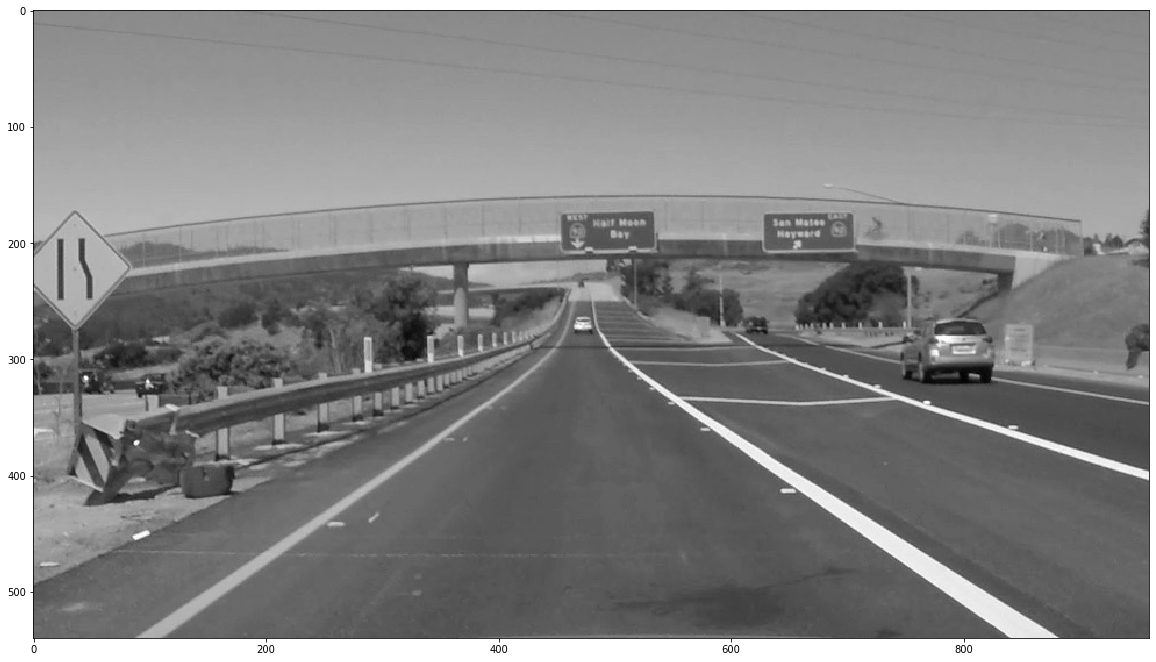

In [11]:
# Here we read a .jpg and convert to 0,255 bytescale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,12))
plt.imshow(gray, cmap='gray')

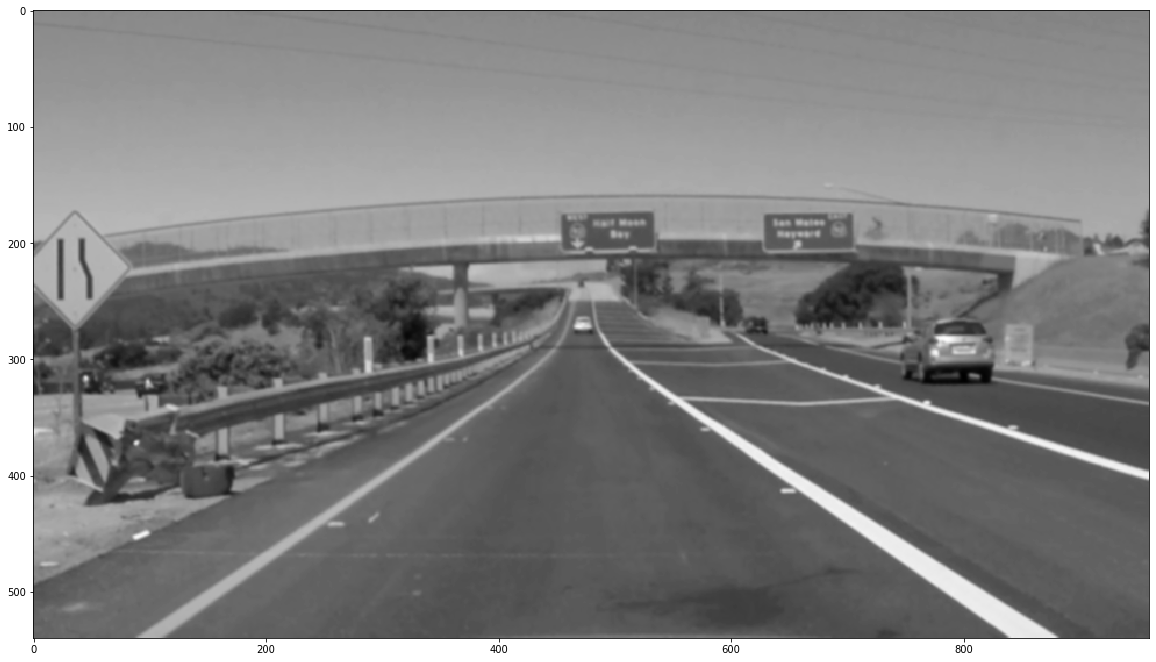

In [16]:
## Define a kernel size for Gaussian smoothing / blurring
## Include Gaussian smoothing, before running Canny, which is essentially a way of suppressing noise and spurious gradients by averaging 

## See https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur
# A larger kernel_size implies averaging, or smoothing, over a larger area. 

# Check out https://www.udacity.com/course/introduction-to-computer-vision--ud810 for the math underpinning these functions

kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.figure(figsize=(20,12))
plt.imshow(blur_gray, cmap='gray')

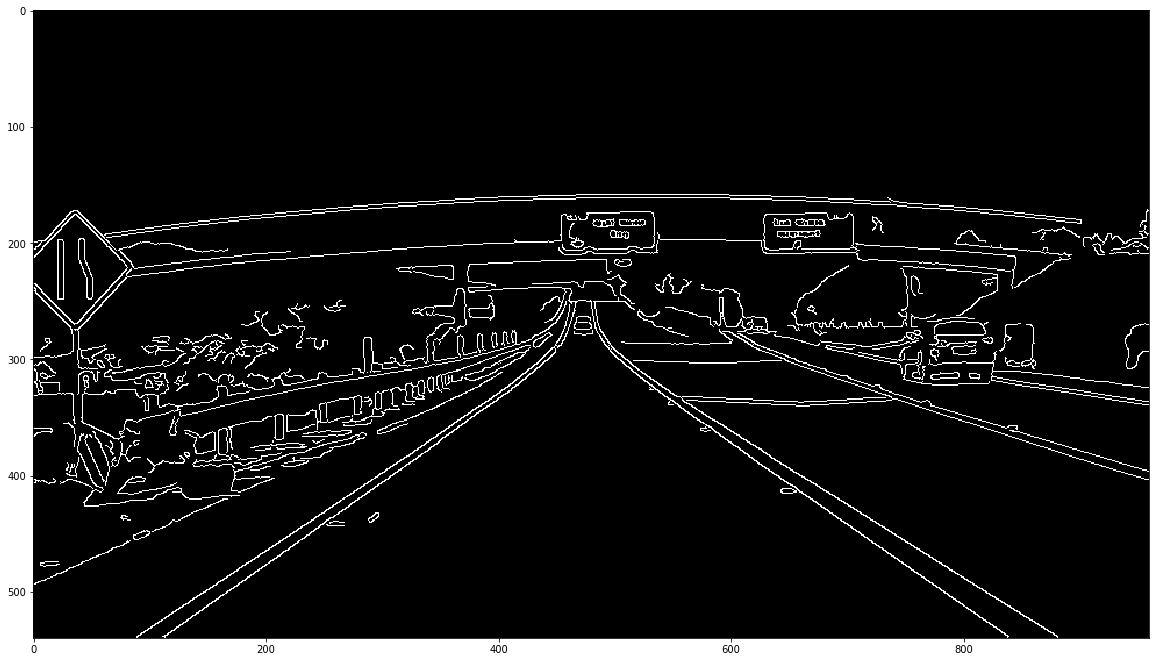

In [26]:
## applying Canny to the image gray and output will be another image called edges. 
## low_threshold and high_threshold are thresholds for edge detection.

## Canny algorithm will first detect strong edge (strong gradient) pixels above the high_threshold
## and reject pixels below the low_threshold.

## Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges
## The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else
## See https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

## What would make sense as a reasonable range for these parameters? 
##  In our case, converting to grayscale has left us with an 8-bit image, so each pixel can take 2^8 = 256 possible values. 
##  Hence, the pixel values range from 0 to 255.

## This range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds. 
## So, a reasonable range for your threshold parameters would also be in the tens to hundreds.

## As far as a ratio of low_threshold to high_threshold, John Canny himself recommended a low to high ratio of 1:2 or 1:3.

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.figure(figsize=(20,12))
plt.imshow(edges, cmap='Greys_r')